In [5]:
# based on https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/reset/backend_reset
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, QuantumCircuit, execute, assemble, schedule, transpile
from qiskit.providers.ibmq.job import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import  plot_gate_map

In [8]:
IBMQ.load_account()
backName='ibmq_guadalupe'
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='lbnl', project='chm170')
backend = provider.get_backend(backName)
print('\nmy backend=',backend)
config = backend.configuration()
print(config.supported_instructions)
plot_gate_map(backend, plot_directed=True)

assert 'reset' in config.supported_instructions ,'check that the reset instruction is supported on the requested backend.'

ibmqfactory.load_account:WARNING:2022-10-05 14:19:40,603: Credentials are already in use. The existing account in the session will be replaced.



my backend= ibmq_guadalupe
['shiftf', 'setf', 'sx', 'play', 'cx', 'u1', 'delay', 'rz', 'id', 'measure', 'u3', 'x', 'acquire', 'reset', 'u2']


In [12]:
def my_circ(n_resets=0):
    """Do h, then n_resets reset instructions, then x on a single qubit."""
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    if n_resets>0:  qc.reset([0]*n_resets)
    qc.x(0)
    qc.measure(0,0)
    return qc

In [13]:
circs0 = [my_circ(0),my_circ(1),my_circ(3),my_circ(5)]
job = execute(circs0, backend, initial_layout=[0])
jid=job.job_id()
print('run on %s job %s ...'%(backend,jid))
job_monitor(job)

Job Status: job is queued (1) [Est. wait time: 1 hrs 21 min]  

KeyboardInterrupt: 

In [14]:
job_id='633df64b007ac522af9e7a18'
job = backend.retrieve_job(job_id)

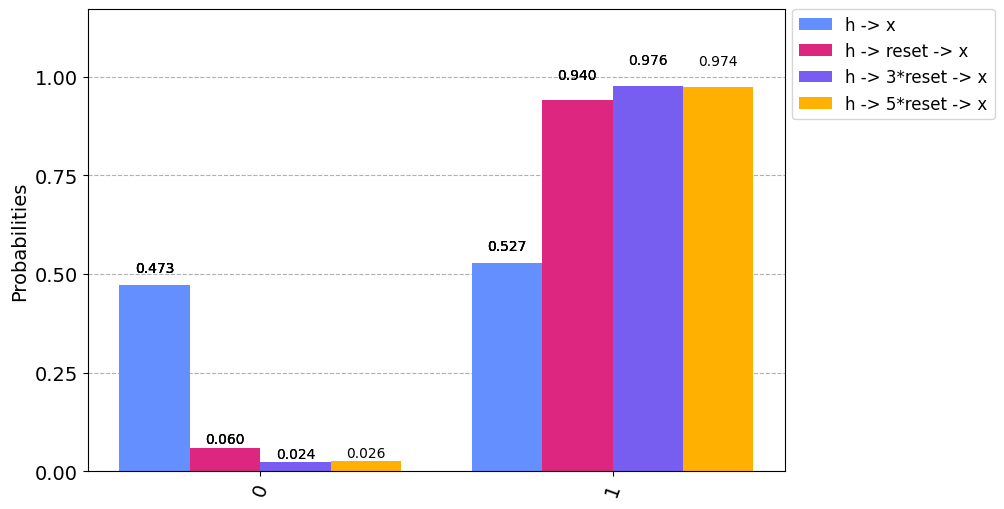

In [15]:
counts1 = job.result().get_counts()

legend_1q = ['h -> x', 'h -> reset -> x', 'h -> 3*reset -> x', 'h -> 5*reset -> x' ]
plot_histogram(counts1, legend=legend_1q, figsize=(9, 6))

In [16]:
counts1[1]

{'0': 239, '1': 3761}